# 🎬 Movies Metadata Analysis & Visualization

Welcome to this **Movie Dataset Analysis** notebook!

In this notebook, we’ll:       
✅ **Clean and preprocess the data** (handling missing values, transforming features)  
✅ **Explore movie industry trends** through visualizations  
✅ **Answer key questions** like:  
- How are movie budgets distributed?  
- Which genres are most common?  
- Does a bigger budget mean more revenue or profit?  
- How have movies evolved over the years?  

---

## 📌 **About the Dataset**
We’re using a movie metadata dataset (originally from [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)) that contains:
- Budget, revenue, and profit information  
- Genre and language details  
- Release dates  
- Ratings (average votes, popularity)

---

## 🚀 **How to Use This Notebook**
1️⃣ Run each cell in order — code blocks will clean, transform, and visualize the data.  
2️⃣ Explore the charts and outputs to understand patterns in the movie industry.  
3️⃣ Feel free to modify code or add your own analyses!

👉 **Libraries used**:  
`pandas`, `numpy`, `seaborn`, `matplotlib`, `ast`, `collections`

---

## 📊 **Main Analyses**
Throughout the notebook, we’ll cover:
- Budget and profit distributions  
- Top genres  
- Budget vs revenue trends  
- Popularity vs ratings  
- Budget categories over years  
- Runtime and genre insights  

---

🎯 **Goal:** Gain a deeper understanding of how different factors (budget, genre, release year, etc.) relate to movie success.

---

⚡ *Tip: If you’re running on Colab, make sure the dataset CSV is uploaded and paths are set correctly.*



In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [104]:
df=pd.read_csv("/content/movies_metadata.csv")
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/w8crvpc3KisHMH72Da5ktwHf6rY.jpg,NaN,0,"[{'id':99,'name':'Documentary'}]",NaN,526313,tt8412232,en,A Leaf of Faith,...,2018-05-21,0,86.0,[],Released,"Kill the pain, not the patient.",A Leaf of Faith,False,8.0,5
1,False,/w7MsyOpP003FYhsiTgVHa3rNsrz.jpg,NaN,18000000,"[{'id':18,'name':'Drama'},{'id':10751,'name':'...",http://www.adogswayhome.movie/,508763,tt7616798,en,A Dog's Way Home,...,2019-01-10,17643857,96.0,"[{'iso_639_1':'en','name':'English'}]",Released,A lot can happen between lost and found.,A Dog's Way Home,False,6.5,76
2,False,/jMBXArRB02mFB5H4qZIZwojeG1S.jpg,"{'id':124901,'name':'Hatchet Collection','post...",0,"[{'id':27,'name':'Horror'},{'id':53,'name':'Th...",http://ariescope.com/2011/04/12/hatchet-iii/,167575,tt1870419,en,Hatchet III,...,2013-06-14,0,89.0,"[{'iso_639_1':'en','name':'English'}]",Released,Victor Crowley Lives Again,Hatchet III,False,5.5,145
3,False,/u2fwkirPOiYzmYgtGbInPQtpQo0.jpg,"{'id':124950,'name':'American Graffiti Collect...",777000,"[{'id':35,'name':'Comedy'},{'id':18,'name':'Dr...",NaN,838,tt0069704,en,American Graffiti,...,1973-08-01,140000000,110.0,"[{'iso_639_1':'en','name':'English'}]",Released,Where were you in '62?,American Graffiti,False,7.1,597
4,False,/7JUshKTF1oM9exGlRltube4cuQ7.jpg,"{'id':93369,'name':'Ringu Collection','poster_...",6000000,"[{'id':27,'name':'Horror'}]",NaN,9674,tt0235712,ja,??????????????????????????????,...,2000-01-22,0,99.0,"[{'iso_639_1':'ja','name':'?????????'}]",Released,NaN,Ringu 0,False,6.0,75


In [105]:
df.tail()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
10933,False,/mU8zfCOTbahNGH0ZBTCuNdX16gj.jpg,NaN,24000000,"[{'id':28,'name':'Action'},{'id':80,'name':'Cr...",http://www.22bullets.co.uk/,37645,tt1167638,fr,L'Immortel,...,2010-03-23,0,115.0,"[{'iso_639_1':'en','name':'English'},{'iso_639...",Released,The revenge of the Professional.,22 Bullets,False,6.4,489
10934,False,/i6wWaGsd1PxQq9AIK29GRHt96Pv.jpg,NaN,650000,"[{'id':27,'name':'Horror'},{'id':53,'name':'Th...",NaN,137145,tt1877543,pt,247??F,...,2011-09-01,0,90.0,"[{'iso_639_1':'en','name':'English'}]",Released,Every Degree Matters,247??F,False,5.2,82
10935,False,/lSPsevGgWT3Rqc9OMTyeEsZsOpf.jpg,NaN,20000000,"[{'id':18,'name':'Drama'},{'id':80,'name':'Cri...",http://www.21-grams.com/index.php,470,tt0315733,en,21 Grams,...,2003-09-06,60427839,124.0,"[{'iso_639_1':'en','name':'English'}]",Released,How much does life weigh?,21 Grams,False,7.3,1530
10936,False,/3quapHSlorOsbkh0b6IgyCGIBni.jpg,NaN,35000000,"[{'id':18,'name':'Drama'},{'id':80,'name':'Cri...",http://www.sonypictures.com/movies/21/,8065,tt0478087,en,21,...,2008-03-27,69823199,123.0,"[{'iso_639_1':'en','name':'English'}]",Released,They proved the Vegas Blackjack System was bea...,21,False,6.6,2255
10937,False,/vNxtjmr4jihOlFg6g07n2Nf4xNl.jpg,NaN,0,"[{'id':28,'name':'Action'},{'id':53,'name':'Th...",NaN,277399,tt3481210,it,2047 - Sights of Death,...,2014-06-13,0,85.0,"[{'iso_639_1':'en','name':'English'}]",Released,Kill or Be Killed,2047: Sights of Death,False,2.7,25


In [106]:
df.shape

(10938, 25)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10938 entries, 0 to 10937
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10938 non-null  bool   
 1   backdrop_path          10743 non-null  object 
 2   belongs_to_collection  1792 non-null   object 
 3   budget                 10938 non-null  int64  
 4   genres                 10938 non-null  object 
 5   homepage               3620 non-null   object 
 6   id                     10938 non-null  int64  
 7   imdb_id                10938 non-null  object 
 8   original_language      10938 non-null  object 
 9   original_title         10938 non-null  object 
 10  overview               10929 non-null  object 
 11  popularity             10938 non-null  float64
 12  poster_path            10938 non-null  object 
 13  production_companies   10938 non-null  object 
 14  production_countries   10938 non-null  object 
 15  re

In [108]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.093800e+04,10938.000000,10938.000000,1.093800e+04,10847.000000,10938.000000,10938.000000
mean,1.448654e+07,179861.979155,7.058037,4.440145e+07,101.220061,6.061602,677.954105
std,3.302808e+07,185445.506614,7.307274,1.317882e+08,20.125990,1.347820,1620.420555
min,0.000000e+00,5.000000,0.600000,0.000000e+00,3.000000,0.000000,0.000000
25%,0.000000e+00,14840.000000,2.401250,0.000000e+00,90.000000,5.500000,19.000000
50%,0.000000e+00,80352.500000,5.798000,0.000000e+00,98.000000,6.200000,88.000000
75%,1.300000e+07,345937.250000,9.465500,2.221591e+07,110.000000,6.900000,542.000000
max,5.000000e+08,590084.000000,196.775000,2.787965e+09,340.000000,10.000000,21454.000000


In [109]:
df.isnull().sum()

,0
adult,0
backdrop_path,195
belongs_to_collection,9146
budget,0
genres,0
homepage,7318
id,0
imdb_id,0
original_language,0
original_title,0


In [110]:
df.id.nunique()

10898

In [111]:
#removing duplicates
df.drop_duplicates(subset='id',keep='first',inplace=True)

In [112]:
df.shape

(10898, 25)

In [113]:
df.isnull().sum()

,0
adult,0
backdrop_path,192
belongs_to_collection,9110
budget,0
genres,0
homepage,7295
id,0
imdb_id,0
original_language,0
original_title,0


In [114]:
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

1.adult

In [115]:
df.adult

,adult
0,False
1,False
2,False
3,False
4,False
...,...
10933,False
10934,False
10935,False
10936,False


In [116]:
df.adult.unique()

array([False,  True])

In [117]:
#Categorical values into boolean
df['adult'] = df['adult'].map({'False': 0, 'True': 1})

2.backdrop_path

In [118]:
df['backdrop_path']

,backdrop_path
0,/w8crvpc3KisHMH72Da5ktwHf6rY.jpg
1,/w7MsyOpP003FYhsiTgVHa3rNsrz.jpg
2,/jMBXArRB02mFB5H4qZIZwojeG1S.jpg
3,/u2fwkirPOiYzmYgtGbInPQtpQo0.jpg
4,/7JUshKTF1oM9exGlRltube4cuQ7.jpg
...,...
10933,/mU8zfCOTbahNGH0ZBTCuNdX16gj.jpg
10934,/i6wWaGsd1PxQq9AIK29GRHt96Pv.jpg
10935,/lSPsevGgWT3Rqc9OMTyeEsZsOpf.jpg
10936,/3quapHSlorOsbkh0b6IgyCGIBni.jpg


In [119]:
df['backdrop_path'].unique()

array(['/w8crvpc3KisHMH72Da5ktwHf6rY.jpg',
       '/w7MsyOpP003FYhsiTgVHa3rNsrz.jpg',
       '/jMBXArRB02mFB5H4qZIZwojeG1S.jpg', ...,
       '/lSPsevGgWT3Rqc9OMTyeEsZsOpf.jpg',
       '/3quapHSlorOsbkh0b6IgyCGIBni.jpg',
       '/vNxtjmr4jihOlFg6g07n2Nf4xNl.jpg'], dtype=object)

In [120]:
#backdrop_path is not useful for analysis and remove column
df.drop(columns=['backdrop_path'], inplace=True)

3.belongs_to_collection

In [121]:
df['belongs_to_collection']

,belongs_to_collection
0,NaN
1,NaN
2,"{'id':124901,'name':'Hatchet Collection','post..."
3,"{'id':124950,'name':'American Graffiti Collect..."
4,"{'id':93369,'name':'Ringu Collection','poster_..."
...,...
10933,NaN
10934,NaN
10935,NaN
10936,NaN


In [122]:
df['belongs_to_collection'].head().unique()

array([nan,
       "{'id':124901,'name':'Hatchet Collection','poster_path':'/3Y0JXGlLLYjlHVWUS50uwkSlxpL.jpg','backdrop_path':'/f3q5nrEJrhRFr0c2proh8Q9x4xx.jpg'}",
       "{'id':124950,'name':'American Graffiti Collection','poster_path':'/nXbscwjttQTQ5OWskK7TSi5CSpH.jpg','backdrop_path':'/fkQH8aHqLpdDYXyCXdqRgYOhsoN.jpg'}",
       "{'id':93369,'name':'Ringu Collection','poster_path':'/eQX9SK5WPdsKWRGLfga4w9KuskV.jpg','backdrop_path':'/aS42DTtR6UYNLfKdKJBKYL1OS1U.jpg'}"],
      dtype=object)

In [123]:
df['belongs_to_collection'].isnull().sum()

np.int64(9110)

In [124]:
#handling missing values
#NaN - 0  and belongs_collection - 1
# Create in_collection
df['in_collection'] = df['belongs_to_collection'].notnull().astype(int)
df.drop(columns=['belongs_to_collection'], inplace=True)
df['in_collection']

,in_collection
0,0
1,0
2,1
3,1
4,1
...,...
10933,0
10934,0
10935,0
10936,0


4.budget

In [125]:
df['budget']

,budget
0,0
1,18000000
2,0
3,777000
4,6000000
...,...
10933,24000000
10934,650000
10935,20000000
10936,35000000


In [126]:
df['budget'].unique()

array([        0,  18000000,    777000,   6000000,  50000000,  17500000,
         2000000,  20000000,   1750000,      1000,   5000000,      1600,
         1300000,  15000000,  22000000,   3000000,     10000,        12,
         1730000, 135000000,   2500000,  41677699,  16000000,  12000000,
         4500000,    180000,  10000000,   7000000,  65000000,  17000000,
        60000000,    395168,  25000000,   1073000,   1000000,   4000000,
        42000000,   1800000,   1500000,    300000,    500000,    120000,
       160000000,  30000000,  29000000, 130000000,    750000,   3716946,
           17000,   4100000, 100000000,  53000000,  14000000,  35000000,
              90,    950000,   5500000,    190000,    450000,     15000,
        90000000,   1600000,    780000,  13000000,  48000000,  23000000,
         9000000,   7700000, 200000000,   2800000,   8500000,   3500000,
         3200000,   8000000,   6500000,   2300000, 175000000,  12716953,
           85000,         2,     30000,         3, 

In [127]:
# Budget: convert and clean
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df.loc[df['budget'] < 10000, 'budget'] = np.nan
df['budget_filled'] = df['budget'].fillna(df['budget'].median())

In [128]:
def budget_category(budget):
    if pd.isna(budget):
        return 'Unknown'
    elif budget < 1e6:
        return 'Low'
    elif budget < 2e7:
        return 'Medium'
    elif budget < 1e8:
        return 'High'
    else:
        return 'Blockbuster'

In [129]:
df['budget_category'] = df['budget'].apply(budget_category)
df['budget_category']

,budget_category
0,Unknown
1,Medium
2,Unknown
3,Low
4,Medium
...,...
10933,High
10934,Low
10935,High
10936,High


In [130]:
df['budget_category'].value_counts()

,count
budget_category,
Unknown,6062
Medium,2186
High,1867
Blockbuster,395
Low,388


5.genres

In [131]:
df['genres']

,genres
0,"[{'id':99,'name':'Documentary'}]"
1,"[{'id':18,'name':'Drama'},{'id':10751,'name':'..."
2,"[{'id':27,'name':'Horror'},{'id':53,'name':'Th..."
3,"[{'id':35,'name':'Comedy'},{'id':18,'name':'Dr..."
4,"[{'id':27,'name':'Horror'}]"
...,...
10933,"[{'id':28,'name':'Action'},{'id':80,'name':'Cr..."
10934,"[{'id':27,'name':'Horror'},{'id':53,'name':'Th..."
10935,"[{'id':18,'name':'Drama'},{'id':80,'name':'Cri..."
10936,"[{'id':18,'name':'Drama'},{'id':80,'name':'Cri..."


In [132]:
df['genres'].unique()

array(["[{'id':99,'name':'Documentary'}]",
       "[{'id':18,'name':'Drama'},{'id':10751,'name':'Family'},{'id':12,'name':'Adventure'}]",
       "[{'id':27,'name':'Horror'},{'id':53,'name':'Thriller'},{'id':35,'name':'Comedy'},{'id':28,'name':'Action'}]",
       ...,
       "[{'id':10751,'name':'Family'},{'id':12,'name':'Adventure'},{'id':35,'name':'Comedy'},{'id':10402,'name':'Music'},{'id':16,'name':'Animation'}]",
       "[{'id':12,'name':'Adventure'},{'id':28,'name':'Action'},{'id':18,'name':'Drama'},{'id':14,'name':'Fantasy'}]",
       "[{'id':28,'name':'Action'},{'id':12,'name':'Adventure'},{'id':10752,'name':'War'}]"],
      dtype=object)

In [133]:
# Genres
df['genres_list'] = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if pd.notnull(x) else [])
df['genres_list']

,genres_list
0,[Documentary]
1,"[Drama, Family, Adventure]"
2,"[Horror, Thriller, Comedy, Action]"
3,"[Comedy, Drama]"
4,[Horror]
...,...
10933,"[Action, Crime, Thriller]"
10934,"[Horror, Thriller]"
10935,"[Drama, Crime, Thriller]"
10936,"[Drama, Crime]"


In [134]:
df.drop('genres',inplace=True,axis=1)

6.homepage

In [135]:
df['homepage']

,homepage
0,NaN
1,http://www.adogswayhome.movie/
2,http://ariescope.com/2011/04/12/hatchet-iii/
3,NaN
4,NaN
...,...
10933,http://www.22bullets.co.uk/
10934,NaN
10935,http://www.21-grams.com/index.php
10936,http://www.sonypictures.com/movies/21/


In [136]:
df['homepage'].unique()

array([nan, 'http://www.adogswayhome.movie/',
       'http://ariescope.com/2011/04/12/hatchet-iii/', ...,
       'http://www.22bullets.co.uk/', 'http://www.21-grams.com/index.php',
       'http://www.sonypictures.com/movies/21/'], dtype=object)

In [137]:
df['homepage'].isnull().sum()

np.int64(7295)

In [138]:
#more null values so we remove "homepage" column
df.drop('homepage',inplace=True,axis=1)

7.movie id

In [139]:
df['id']

,id
0,526313
1,508763
2,167575
3,838
4,9674
...,...
10933,37645
10934,137145
10935,470
10936,8065


In [140]:
df['id'].unique()

array([526313, 508763, 167575, ...,    470,   8065, 277399])

In [141]:
df['id'].nunique()

10898

8.imdb id

In [142]:
df['imdb_id']

,imdb_id
0,tt8412232
1,tt7616798
2,tt1870419
3,tt0069704
4,tt0235712
...,...
10933,tt1167638
10934,tt1877543
10935,tt0315733
10936,tt0478087


In [143]:
df['imdb_id'].unique()

array(['tt8412232', 'tt7616798', 'tt1870419', ..., 'tt0315733',
       'tt0478087', 'tt3481210'], dtype=object)

In [144]:
df['imdb_id'].nunique()

10898

In [145]:
#we have movie id  no need imdb id . so we can remove it
df.drop('imdb_id',inplace=True,axis=1)

9. original language

In [146]:
df['original_language']

,original_language
0,en
1,en
2,en
3,en
4,ja
...,...
10933,fr
10934,pt
10935,en
10936,en


In [147]:
df['original_language'].unique()

array(['en', 'ja', 'hi', 'de', 'ko', 'pt', 'it', 'fi', 'fr', 'ms', 'cn',
       'tr', 'es', 'ru', 'sv', 'pl', 'hu', 'zh', 'nl', 'ar', 'da', 'el',
       'id', 'cs', 'no', 'tl', 'is', 'he', 'mr', 'km', 'te', 'bn', 'eu',
       'af', 'fa', 'sk', 'et', 'ta', 'sr', 'uk', 'th', 'ca', 'ur', 'vi',
       'ro', 'yi'], dtype=object)

In [148]:
df['original_language'].nunique()

46

In [149]:
df['original_title']

,original_title
0,A Leaf of Faith
1,A Dog's Way Home
2,Hatchet III
3,American Graffiti
4,??????????????????????????????
...,...
10933,L'Immortel
10934,247??F
10935,21 Grams
10936,21


In [150]:
df['original_title'].unique()

array(['A Leaf of Faith', "A Dog's Way Home", 'Hatchet III', ...,
       '21 Grams', '21', '2047 - Sights of Death'], dtype=object)

In [151]:
df['original_title'].nunique()

10429

In [152]:
df['overview']

,overview
0,Documentary exploring a plant-based alternativ...
1,A Dog???s Way Home chronicles the heartwarming...
2,A search and recovery team heads into the haun...
3,A couple of high school graduates spend one fi...
4,Taking place thirty years before the events of...
...,...
10933,Charly Mattei?? has turned his back on his lif...
10934,Four friends travel to a lakeside cabin for a ...
10935,This is the story of three gentle persons: Pau...
10936,"Ben Campbell is a young, highly intelligent, s..."


In [153]:
df['overview'].isnull().sum()

np.int64(9)

In [154]:
#no need for furture analysis. so remove it
df.drop('overview',inplace=True,axis=1)

In [155]:
df['popularity']

,popularity
0,2.305
1,64.245
2,6.478
3,10.857
4,5.691
...,...
10933,7.606
10934,4.894
10935,12.441
10936,12.705


In [156]:
df['popularity'].isnull().sum()

np.int64(0)

In [157]:
df['poster_path']

,poster_path
0,/yBR1TbSZ2Y4nkBj85q07OgY9L03.jpg
1,/pZn87R7gtmMCGGO8KeaAfZDhXLg.jpg
2,/xQPHO8QVE7U3XuPRxqVmqpA4Csq.jpg
3,/xq8MFYQ6MLZ65mFpweqV6mCs39k.jpg
4,/26Jcnk6ObDPCtvKqZkgjWI1b8Y1.jpg
...,...
10933,/wTYZjPq4YA2wC99MdHZTFQuxFpd.jpg
10934,/yNSE6aAS8pa2kzxDwCkpAIlNeQx.jpg
10935,/Aps7GzrYiJZKHNT524Rsg4jaXej.jpg
10936,/4zKAgycQDJD2zIkmPYV3aMR8tEy.jpg


In [158]:
#we not need poster_path for analysis
df.drop('poster_path',inplace=True,axis=1)

In [159]:
df['production_companies']

,production_companies
0,"[{'id':104960,'logo_path':null,'name':'Oxymoro..."
1,"[{'id':30148,'logo_path':null,'name':'Bona Fil..."
2,"[{'id':3960,'logo_path':null,'name':'ArieScope..."
3,"[{'id':33,'logo_path':'/8lvHyhjr8oUKOOy2dKXoAL..."
4,[]
...,...
10933,"[{'id':6896,'logo_path':'/2Q89KvzxTKB5BAv9RqFI..."
10934,"[{'id':68937,'logo_path':null,'name':'Foley Wa..."
10935,"[{'id':10059,'logo_path':null,'name':'This Is ..."
10936,"[{'id':5,'logo_path':'/71BqEFAF4V3qjjMPCpLuyJF..."


In [160]:
#we no need this data for analysis.so remove it

df.drop('production_companies',inplace=True,axis=1)

In [161]:
df['production_countries']

,production_countries
0,[]
1,"[{'iso_3166_1':'US','name':'United States of A..."
2,"[{'iso_3166_1':'US','name':'United States of A..."
3,"[{'iso_3166_1':'US','name':'United States of A..."
4,"[{'iso_3166_1':'JP','name':'Japan'}]"
...,...
10933,"[{'iso_3166_1':'FR','name':'France'}]"
10934,"[{'iso_3166_1':'GE','name':'Georgia'},{'iso_31..."
10935,"[{'iso_3166_1':'US','name':'United States of A..."
10936,"[{'iso_3166_1':'US','name':'United States of A..."


In [162]:
#we no need this data for analysis.so remove it

df.drop('production_countries',inplace=True,axis=1)

Release date

In [163]:
df['release_date']

,release_date
0,2018-05-21
1,2019-01-10
2,2013-06-14
3,1973-08-01
4,2000-01-22
...,...
10933,2010-03-23
10934,2011-09-01
10935,2003-09-06
10936,2008-03-27


In [164]:
# Convert to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract features
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [165]:
df['revenue']

,revenue
0,0
1,17643857
2,0
3,140000000
4,0
...,...
10933,0
10934,0
10935,60427839
10936,69823199


In [166]:
# Revenue
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['revenue'].replace(0, np.nan, inplace=True)
df['revenue'].fillna(df['revenue'].median(), inplace=True)

<ipython-input-166-3453289788>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revenue'].replace(0, np.nan, inplace=True)


In [167]:
# Profit
df['profit'] = df['revenue'] - df['budget_filled']

In [168]:
df['revenue']

,revenue
0,38751734.0
1,17643857.0
2,38751734.0
3,140000000.0
4,38751734.0
...,...
10933,38751734.0
10934,38751734.0
10935,60427839.0
10936,69823199.0


In [169]:
df['profit']

,profit
0,21751734.0
1,-356143.0
2,21751734.0
3,139223000.0
4,32751734.0
...,...
10933,14751734.0
10934,38101734.0
10935,40427839.0
10936,34823199.0


In [170]:
df['runtime']

,runtime
0,86.0
1,96.0
2,89.0
3,110.0
4,99.0
...,...
10933,115.0
10934,90.0
10935,124.0
10936,123.0


In [171]:
df['runtime'].isnull().sum()

np.int64(90)

In [172]:
# Runtime
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['runtime'].fillna(df['runtime'].median(), inplace=True)
df['runtime']

<ipython-input-172-3473576741>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)


,runtime
0,86.0
1,96.0
2,89.0
3,110.0
4,99.0
...,...
10933,115.0
10934,90.0
10935,124.0
10936,123.0


In [173]:
df['spoken_languages']

,spoken_languages
0,[]
1,"[{'iso_639_1':'en','name':'English'}]"
2,"[{'iso_639_1':'en','name':'English'}]"
3,"[{'iso_639_1':'en','name':'English'}]"
4,"[{'iso_639_1':'ja','name':'?????????'}]"
...,...
10933,"[{'iso_639_1':'en','name':'English'},{'iso_639..."
10934,"[{'iso_639_1':'en','name':'English'}]"
10935,"[{'iso_639_1':'en','name':'English'}]"
10936,"[{'iso_639_1':'en','name':'English'}]"


In [174]:
#we have already orginal_language column so need this column for analysis
df.drop('spoken_languages',inplace=True,axis=1)

In [175]:
df['status']

,status
0,Released
1,Released
2,Released
3,Released
4,Released
...,...
10933,Released
10934,Released
10935,Released
10936,Released


In [176]:
df['status'].unique()

array(['Released', 'In Production'], dtype=object)

In [177]:
df['tagline']

,tagline
0,"Kill the pain, not the patient."
1,A lot can happen between lost and found.
2,Victor Crowley Lives Again
3,Where were you in '62?
4,NaN
...,...
10933,The revenge of the Professional.
10934,Every Degree Matters
10935,How much does life weigh?
10936,They proved the Vegas Blackjack System was bea...


In [178]:
df['tagline'].isnull().sum()


np.int64(2799)

In [179]:
#so many missing values so remove it
df.drop('tagline',inplace=True,axis=1)

In [180]:
df['title']

,title
0,A Leaf of Faith
1,A Dog's Way Home
2,Hatchet III
3,American Graffiti
4,Ringu 0
...,...
10933,22 Bullets
10934,247??F
10935,21 Grams
10936,21


In [181]:
df['title'].unique()

array(['A Leaf of Faith', "A Dog's Way Home", 'Hatchet III', ...,
       '21 Grams', '21', '2047: Sights of Death'], dtype=object)

In [182]:
df['title'].nunique()

10650

In [183]:
df['title'].isnull().sum()

np.int64(0)

In [184]:
duplicate_titles = df[df.duplicated('title', keep=False)]

print("Number of duplicated title rows:", duplicate_titles.shape[0])
print(duplicate_titles[['title']].value_counts().head(10))

Number of duplicated title rows: 476
title         
Robin Hood        4
A Star Is Born    3
Dracula           3
Compulsion        3
Carrie            3
Jane Eyre         3
Maniac            3
Life              3
Halloween         3
Hamlet            3
Name: count, dtype: int64


In [185]:
df = df.drop_duplicates(subset=['title'], keep='first')

In [186]:
df.shape

(10650, 21)

In [187]:
df['video']

,video
0,False
1,False
2,False
3,False
4,False
...,...
10933,False
10934,False
10935,False
10936,False


In [188]:
df['vote_average']

,vote_average
0,8.0
1,6.5
2,5.5
3,7.1
4,6.0
...,...
10933,6.4
10934,5.2
10935,7.3
10936,6.6


In [189]:
df['vote_average'].isnull().sum()

np.int64(0)

In [190]:
df['vote_count']

,vote_count
0,5
1,76
2,145
3,597
4,75
...,...
10933,489
10934,82
10935,1530
10936,2255


In [191]:
df['vote_count'].isnull().sum()

np.int64(0)

1. Distribution of Movie Budgets - Understand budget spread & detect outliers.

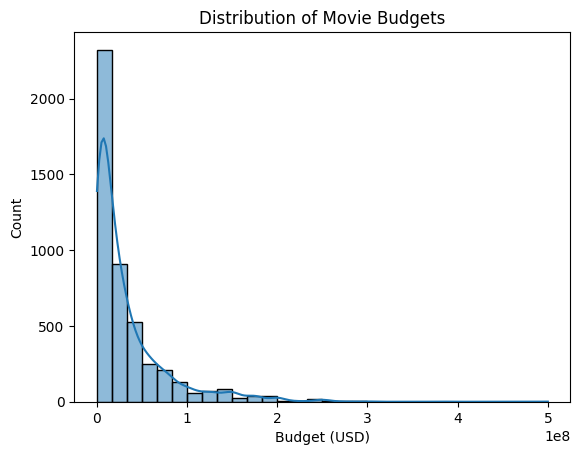

In [192]:
# 1. Distribution of Movie Budgets
sns.histplot(df['budget'], bins=30, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (USD)')
plt.show()

2. Top 10 Genres - See which genres dominate the industry.

<ipython-input-193-1449965732>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genres_df,palette='viridis')


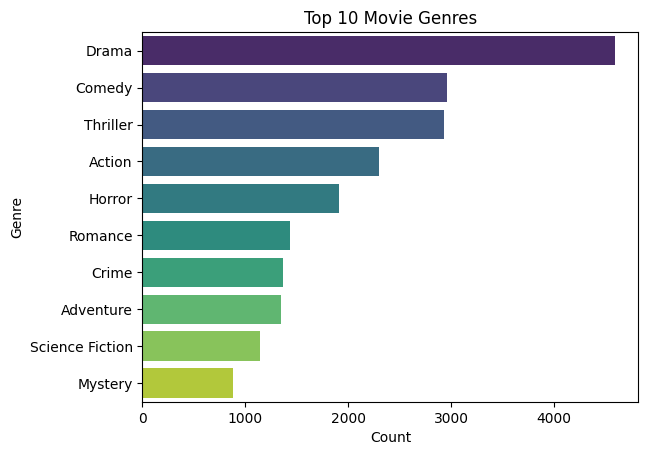

In [193]:
# 2. Top 10 Genres
from collections import Counter
all_genres = df['genres_list'].explode()
top_genres = Counter(all_genres).most_common(10)
genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=genres_df,palette='viridis')
plt.title('Top 10 Movie Genres')
plt.show()

3. Budget vs Revenue Relationship -  Understand how spending affects returns.

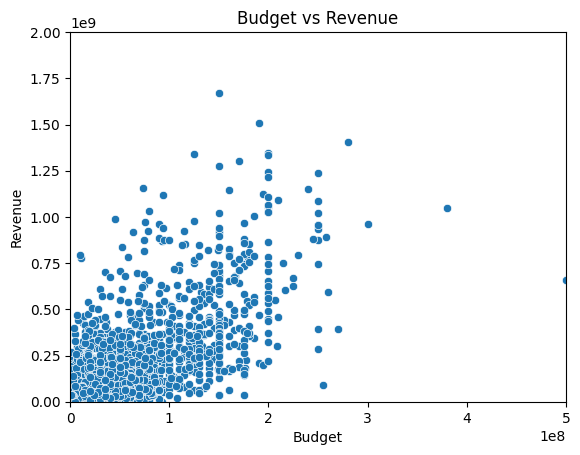

In [194]:
# 3. Budget vs Revenue
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xlim(0, 5e8)
plt.ylim(0, 2e9)
plt.show()

4. Profit Distribution - See how profitable movies are on average.

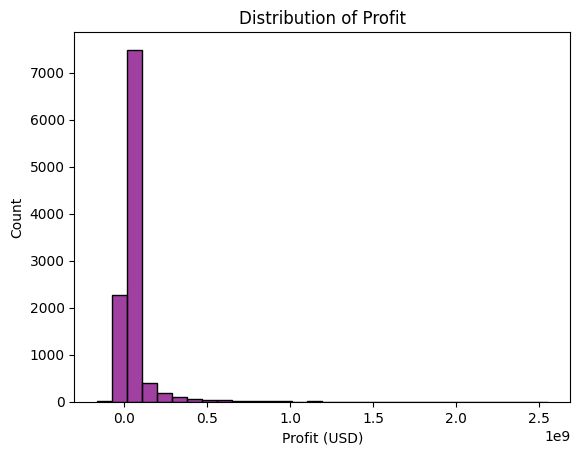

In [195]:
# 4. Profit distribution
sns.histplot(df['profit'], bins=30,color='Purple')
plt.title('Distribution of Profit')
plt.xlabel('Profit (USD)')
plt.show()

5. Number of Movies Released by Year - See industry growth over time.

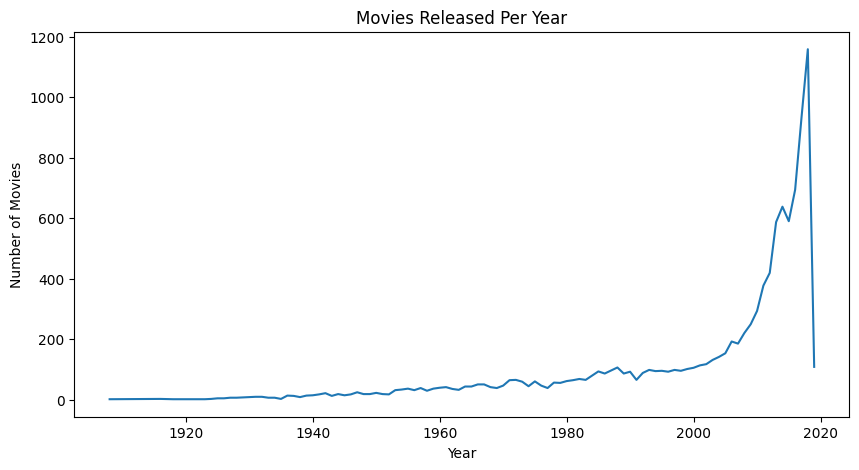

In [196]:
# 5. Movies per year
df['release_year'] = df['release_year'].astype('Int64')
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

6. Average Runtime by Genre- Do action movies run longer?

<ipython-input-197-317813237>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Runtime', y='Genre', data=runtime_df,palette='magma')


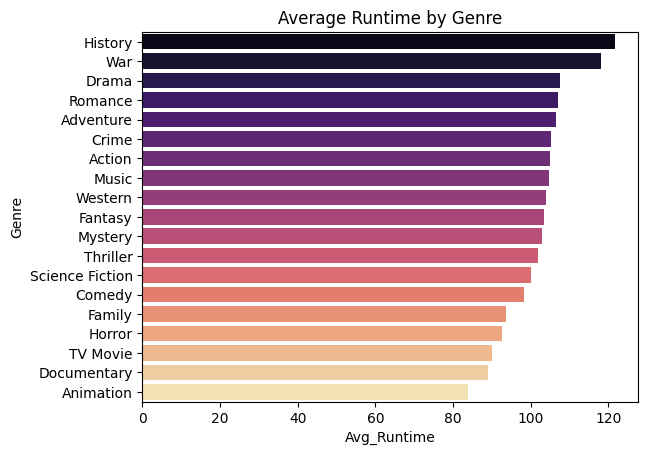

In [197]:
# 6. Avg runtime by genre
genre_runtimes = []
for genre in df['genres_list'].explode().unique():
    if genre:  # skip empty strings
        avg_runtime = df[df['genres_list'].apply(lambda x: genre in x)]['runtime'].mean()
        genre_runtimes.append((genre, avg_runtime))
runtime_df = pd.DataFrame(genre_runtimes, columns=['Genre', 'Avg_Runtime']).sort_values(by='Avg_Runtime', ascending=False)
sns.barplot(x='Avg_Runtime', y='Genre', data=runtime_df,palette='magma')
plt.title('Average Runtime by Genre')
plt.show()

7. Vote Average Distribution - See how audiences rate movies.

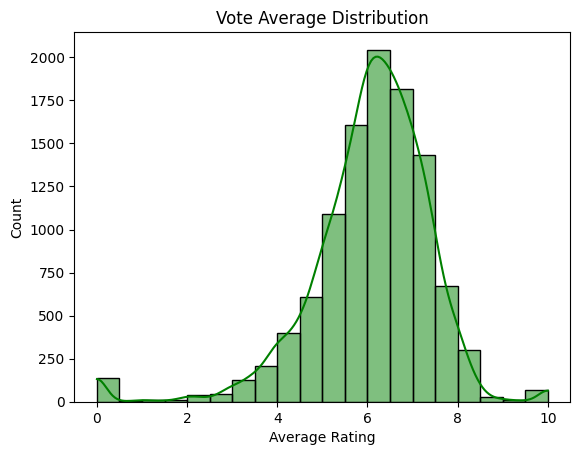

In [198]:
# 7. Vote average distribution
sns.histplot(df['vote_average'], bins=20, kde=True,color='green')
plt.title('Vote Average Distribution')
plt.xlabel('Average Rating')
plt.show()

8. Top 10 Most Profitable Movie

In [199]:
# 8. Top 10 most profitable movies
top_profit = df[['title', 'profit']].sort_values(by='profit', ascending=False).head(10)
print(top_profit)

                                              title        profit
10577                                        Avatar  2.550965e+09
5943                   Star Wars: The Force Awakens  1.823224e+09
2828                         Avengers: Infinity War  1.746240e+09
6599                                 Jurassic World  1.521713e+09
9672                                      Furious 7  1.316249e+09
9522   Harry Potter and the Deathly Hallows: Part 2  1.217000e+09
3559                                  Black Panther  1.146739e+09
2472                 Jurassic World: Fallen Kingdom  1.133460e+09
3987                       Star Wars: The Last Jedi  1.132460e+09
6552                        Avengers: Age of Ultron  1.125404e+09


9. Are popular movies also highly rated?

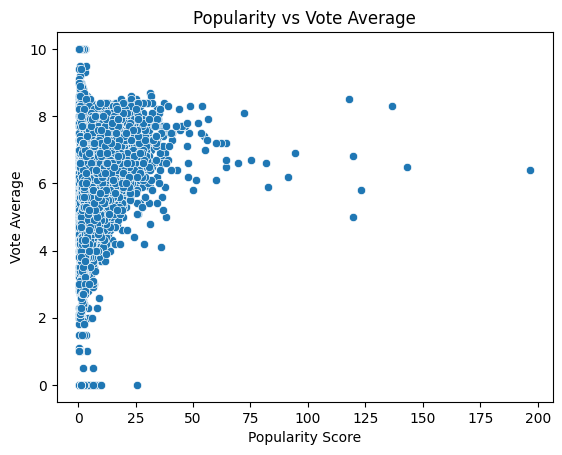

In [200]:
# 9. Popularity vs Rating
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity Score')
plt.ylabel('Vote Average')
plt.show()


10. Avg vote by budget category

<ipython-input-201-581310678>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('budget_category')['vote_average'].mean().sort_index().index,


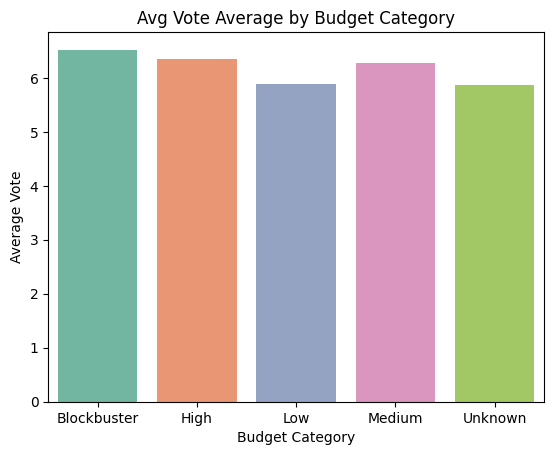

In [201]:
# 10. Avg vote by budget category
sns.barplot(x=df.groupby('budget_category')['vote_average'].mean().sort_index().index,
            y=df.groupby('budget_category')['vote_average'].mean().sort_index().values,
            palette='Set2')
plt.title('Avg Vote Average by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Average Vote')
plt.show()

<ipython-input-202-1435724834>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('budget_category')['popularity'].mean().sort_index().index,


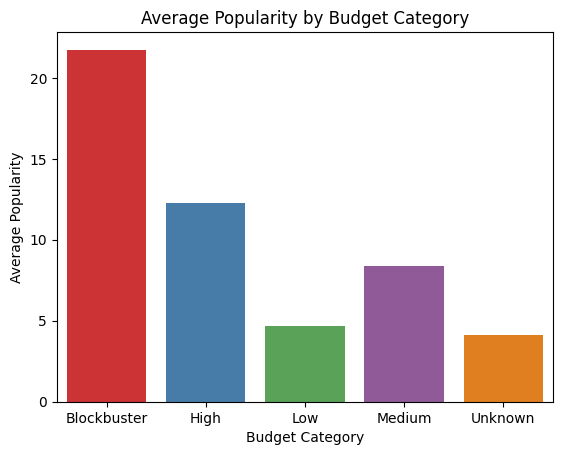

In [202]:
# 11. Avg popularity by budget category
sns.barplot(x=df.groupby('budget_category')['popularity'].mean().sort_index().index,
            y=df.groupby('budget_category')['popularity'].mean().sort_index().values,
            palette='Set1')
plt.title('Average Popularity by Budget Category')
plt.xlabel('Budget Category')
plt.ylabel('Average Popularity')
plt.show()


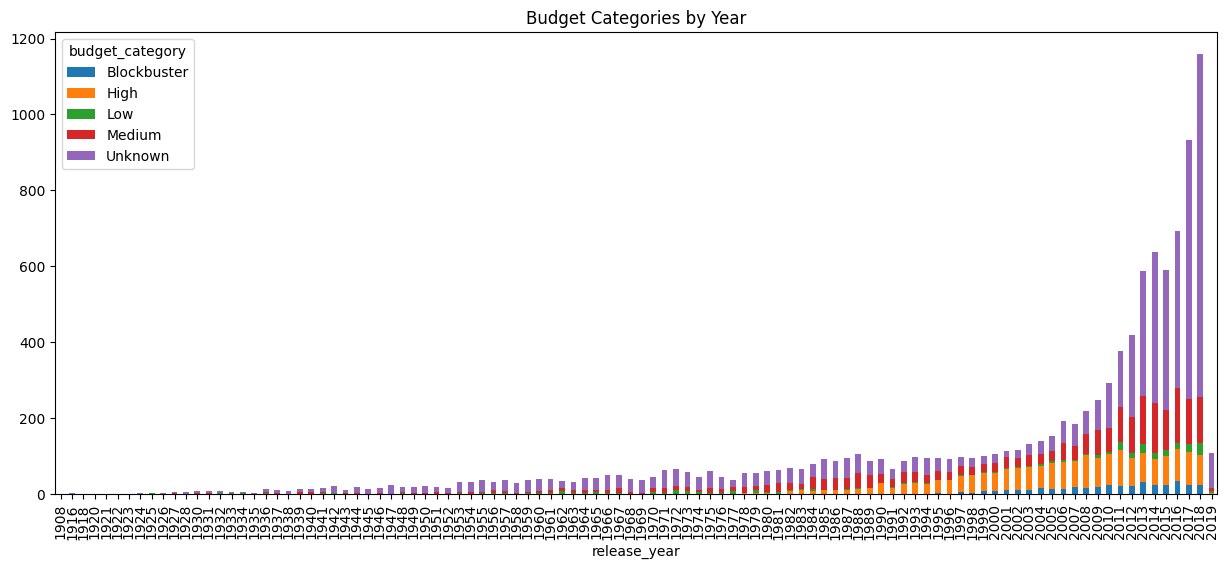

In [203]:
# 12. Budget categories over years
pd.crosstab(df['release_year'], df['budget_category']).plot(
    kind='bar', stacked=True, figsize=(15,6), title='Budget Categories by Year')
plt.show()

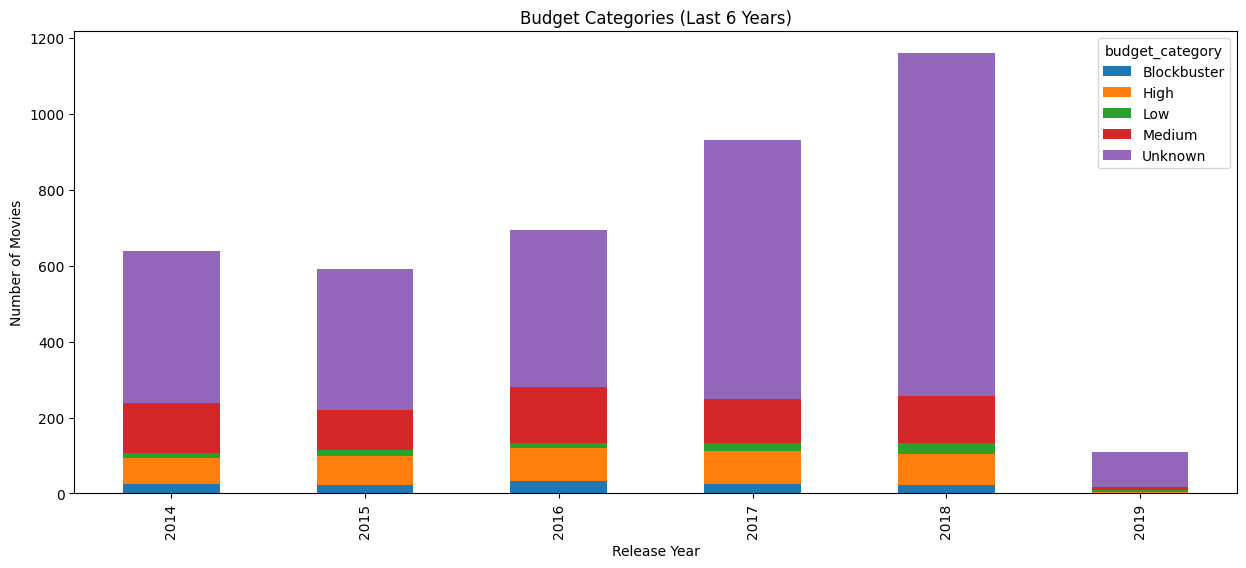

In [204]:
last_6_years = sorted(df['release_year'].dropna().unique())[-6:]
ct = pd.crosstab(df[df['release_year'].isin(last_6_years)]['release_year'], df['budget_category'])

ct.plot(kind='bar', stacked=True, figsize=(15,6), title='Budget Categories (Last 6 Years)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

#Conclusions :
1️⃣ Distribution of Movie Budgets

   The majority of movies have low budgets, typically under $20 million.

   There are a few outliers with extremely high budgets (blockbusters), which skew the distribution to the right.

2️⃣ Top 10 Genres

   The most common genres are Drama, Comedy, and Thriller.

   These genres dominate the industry, suggesting they have a broader appeal or lower production risks.

3️⃣ Budget vs Revenue

   There is a positive correlation between budget and revenue, though not perfectly linear.

   Some low-budget films achieve high revenues (e.g. independent hits), while some big-budget films fail to earn proportional returns.

4️⃣ Profit Distribution

   The profit distribution is wide, with many films making modest profits or losses.

   A small number of films account for massive profits, indicating a hit-driven industry.

5️⃣ Number of Movies Released by Year

   The number of movies released increased steadily over time, reflecting industry growth.

   There may be noticeable dips during certain years (e.g., strikes, economic downturns).

6️⃣ Average Runtime by Genre

   Genres like Adventure and Action tend to have longer runtimes.

   Shorter runtimes are common for Animation and Family films, likely due to audience preferences.

7️⃣ Vote Average Distribution

   Most movies receive average ratings between 5 and 7.

   Very few movies achieve extreme ratings (either very low or very high).

8️⃣ Top 10 Most Profitable Movies

   The most profitable movies often include major blockbusters or surprise hits.

   High profit does not always mean high budget; some low-budget films earned huge profits.

9️⃣ Are popular movies also highly rated?

   There is no strong relationship between popularity and vote average.

   Popularity might be influenced by marketing and hype rather than quality.

🔟 Avg vote by budget category

   Higher budget categories tend to have slightly higher average votes.

   However, even low-budget movies can receive good ratings, suggesting budget isn’t the only factor in perceived quality.

1️⃣1️⃣ Avg popularity by budget category

   Blockbuster and high-budget movies generally have higher average popularity.

   Marketing and distribution likely contribute to this pattern.

1️⃣2️⃣ Budget categories over years

   Recent years show a steady mix of all budget categories, though blockbusters remain consistently present.

   There’s been sustained production of medium and low-budget films even as blockbusters dominate revenue.